In [ ]:
import  csv
import  sys
import  os.path
import  matplotlib.pyplot as plt

class ft_linear_regression :
  def __init__(self) :
    self.open_file()
    self.get_data()
    self.theta_0 = 0.0
    self.theta_1 = 0.0self.tmp_theta_0 = 1.0
        self.tmp_theta_1 = 1.0
        self.prev_mse = 0.0
        self.cur_mse = self.mean_square_error()
        self.delta_mse = self.cur_mse


    def open_file(self) :
 
        if len(sys.argv) == 1 or sys.argv[1][0] == "-" :
            self.name = input("Enter file name: ")
        else :
            self.name = sys.argv[1]

        if (len(self.name) < 1) :
            sys.exit("Error:    File name is too short")


    def get_data(self) :

        self.size = {0, 0}
        self.value = []

        if (os.path.isfile(self.name) == False) :
            sys.exit("Error:    File " + self.name + " doesn't exist")

        if (os.access(self.name, os.R_OK) == False) :
           sys.exit("Error:    Access denied for " + self.name)

        with open(self.name, 'r') as csv_file:
            try:
                dict_val = csv.reader(csv_file, delimiter = ",")
                for row in dict_val:
                    self.value.append(row)
            except:
                sys.exit("Error: File {:} cannot be read".format(csv_file))


    def print_value(self) :

        for row in self.value:
            for column in row:
                print (column, end="\t")
            print ("")


    def estimatePrice(self, mileage) :
        return ((self.tmp_theta_0 + (self.tmp_theta_1 * float(mileage))))
        

    def mean_square_error(self) :

        i = 0
        tmp_summ = 0

        for line in self.value :
            if (i > 0) :
                tmp_diff = self.estimatePrice(line[0]) - float(line[1])
                tmp_diff *= tmp_diff
                tmp_summ += tmp_diff
            i += 1

        return (tmp_summ / (i - 1))


    def get_gradient0(self) :
        i = 0
        tmp_summ = 0.0

        for line in self.value :
            if (i > 0) :
                tmp_summ += (self.estimatePrice(line[0]) - float(line[1]))
            i += 1
        
        return (self.learning_rate * (tmp_summ / (i - 1)))


    def get_gradient1(self) :
        i = 0
        tmp_summ = 0.0

        for line in self.value :
            if (i > 0) :
                tmp_summ += (self.estimatePrice(line[0]) - float(line[1])) \
                    * float(line[0])
            i += 1
        
        return (self.learning_rate * (tmp_summ / (i - 1)))
    

    def set_min_max(self) :

        i = 0
        self.min_x = 2 ** 32 / 1.0
        self.max_x = 2 ** 32 / -1.0
        self.min_y = 2 ** 32 / 1.0
        self.max_y = 2 ** 32 / -1.0

        for line in self.value :
            if (i > 0) :
                if float(line[0]) < self.min_x :
                    self.min_x = float(line[0])
                if float(line[0]) > self.max_x :
                    self.max_x = float(line[0])
                if float(line[1]) < self.min_y :
                    self.min_y = float(line[1])
                if float(line[1]) > self.max_y :
                    self.max_y = float(line[1])
            i += 1


    def standardize(self) :
        i = 0

        self.set_min_max()
        for line in self.value :
            if (i > 0) :
                line[0] = (float(line[0]) - self.min_x) / \
                    (self.max_x - self.min_x)
                line[1] = (float(line[1]) - self.min_y) / \
                    (self.max_y - self.min_y)
            i += 1


    def plot_value(self) :
        tmp_val = self.value
        tmp_val.pop(0)

        tmp_theta0 = self.tmp_theta_0
        tmp_theta1 = self.tmp_theta_1

        self.tmp_theta_0 = self.theta_0
        self.tmp_theta_1 = self.theta_1
        print (self.min_y, self.max_y)
        tmp = list(zip(*tmp_val))
        tmp = [list(tmp[0]), list(tmp[1])]
        plot_val = [[], []]
        for i in tmp[0] :
            i = self.min_x + (self.max_x - self.min_x) * i
            plot_val[0].append(i)
        for i in tmp[1] :
            i = self.min_y + (self.max_y - self.min_y) * i
            plot_val[1].append(i)
        plt.title('Real values')
        plt.xlabel('Mileage')
        plt.ylabel('Price')
        plt.plot(plot_val[0], plot_val[1], 'ro')
        plt.plot([self.min_x, self.max_x], [self.estimatePrice(self.min_x), \
            self.estimatePrice(self.max_x)])
        plt.axis([self.min_x - abs(self.max_x * 0.1), self.max_x + \
            abs(self.max_x * 0.1), self.min_y - abs(self.max_y * 0.1), \
            self.max_y + abs(self.max_y * 0.1)])
        plt.show()
        self.tmp_theta_0 = tmp_theta0
        self.tmp_theta_1 = tmp_theta1


    def plot_standardized_value(self) :
        tmp_val = self.value
        tmp_val.pop(0)

        tmp_val = list(zip(*tmp_val))
        tmp_val = [list(tmp_val[0]), list(tmp_val[1])]
        plt.title('Standardized values')
        plt.xlabel('Mileage')
        plt.ylabel('Price')
        plt.plot(tmp_val[0], tmp_val[1], 'ro')
        plt.plot([0, 1], [self.estimatePrice(0), self.estimatePrice(1)])
        plt.show()


    def save_thetas(self) :
        f = open("indexes.csv", "w+")
        f.write("%f, %f" %(self.theta_0, self.theta_1))
        f.close()


    def train_model(self, learning_rate, print_error) :
        self.learning_rate = learning_rate

        self.standardize()
        while self.delta_mse > 0.0000001 or self.delta_mse < -0.0000001 :
            self.theta_0 = self.tmp_theta_0
            self.theta_1 = self.tmp_theta_1
            self.tmp_theta_0 -= self.get_gradient0()
            self.tmp_theta_1 -= self.get_gradient1()
            self.prev_mse = self.cur_mse
            self.cur_mse = self.mean_square_error()
            if (print_error == 1) :
                print (self.cur_mse)
            self.delta_mse = self.cur_mse - self.prev_mse

        self.theta_1 = (self.max_y - self.min_y) * self.theta_1 / \
            (self.max_x - self.min_x)
        self.theta_0 = self.min_y + ((self.max_y - self.min_y) * \
            self.theta_0) + self.theta_1 * (1 - self.min_x)
        self.save_thetas()


flags = {"plot_standardized": 0, "plot_original": 0, "print_error": 0}
learning_rate = 0
for arg in sys.argv :
    if learning_rate == -1.0 :
        try :
            learning_rate = float(arg) - 0
        except :
            sys.exit("Error: learning rate argument is not a number")
    if arg == "-vs" :
        flags["plot_standardized"] = 1
    if arg == "-vo" :
        flags["plot_original"] = 1
    if arg == "-err" :
        flags["print_error"] = 1
    if arg == "-lr" :
        learning_rate = -1.0

if (learning_rate < 0.0000001 or learning_rate > 1) :
    learning_rate = 0.1

data = linear_regression()
data.train_model(learning_rate, flags["print_error"])

if flags["plot_original"] == 1 :
    data.plot_value()
if flags["plot_standardized"] == 1 :
    data.plot_standardized_value()

SyntaxError: ignored

In [ ]:
import pandas as pd





In [ ]:
data = pd.read_csv('')

FileNotFoundError: ignored

In [ ]:
#нп зиро аррай (или пандас) - начальные параметры (w0)
#w(k) = w(k-1) - nk Q(w(k-1))

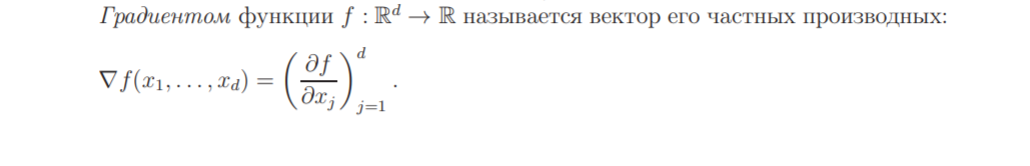


Известно, что градиент является направлением наискорейшего роста функции,
а антиградиент (т.е. −∇f) — направлением наискорейшего убывания. Это ключевое
свойство градиента, обосновывающее его использование в методах оптимизации

Основное свойство антиградиента — он указывает в сторону наискорейшего
убывания функции в данной точке. Соответственно, будет логично стартовать из
некоторой точки, сдвинуться в сторону антиградиента, пересчитать антиградиент и
8
снова сдвинуться в его сторону и т.д. Запишем это более формально. Пусть w
(0) — начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда градиентный спуск состоит в повторении следующих шагов до сходимости:

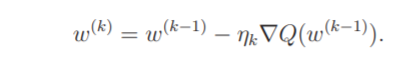

Здесь под Q(w) понимается значение функционала ошибки для набора параметров w.

Через ηk обозначается длина шага, которая нужна для контроля скорости движения. Можно делать её константной: ηk = c. При этом если длина шага слишком
большая, то есть риск постоянно «перепрыгивать» через точку минимума, а если шаг
слишком маленький, то движение к минимуму может занять слишком много итераций. Иногда длину шага монотонно уменьшают по мере движения — например, по
простой формуле
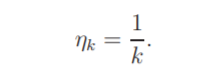

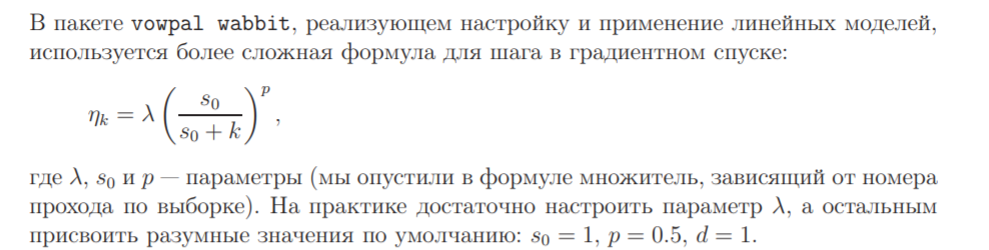

In [ ]:

  
    # рассчитываем результирующий массив с текущими коэффициентами a и b
    # на основе обучающей выборки 
    yhat = a + b * x_train
    
    # 1. определяем лосс
    # считаем отклонение нового результата от обучающего:
    error = (y_train - yhat)
    
    # 2. считаем градиенты (вспоминая формулу производной)
    # для коэффициента a
    a_grad = -2 * error.mean()
    # для коэффициента b
    b_grad = -2 * (x_train * error).mean()
    
    # 3. обновляем параметры, используя коэффициент скорости обучения
    a = a - lr * a_grad
    b = b - lr * b_grad
print(a,b)   

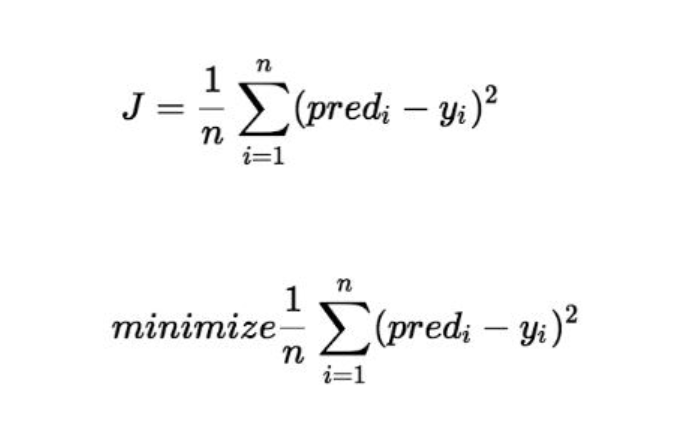

In [ ]:
def pred(theta_array, X_test):
  for i in kol-wo:
  y pred.append = sum(X.stroka * theta_array) (по элементам строки соответствующим) 
  return ypred array

SyntaxError: ignored

In [ ]:
def gradient():
  thetas_array = features + 1; (zeros array)
  # скорость обучения
  lr = 0.01
  # количество эпох
  n_epochs = 10000
  # основной цикл
  for epoch in range(n_epochs):
   ## Q = mse(для каждой или для рандомного) = квадратный корень(sum(pred(theta_arrat, X_test) - y_test)^2)
    for theta in thetas_array:
      if theta == 0:
        theta = theta - lr * (1 / obs_num) * sum(otkl)  
      else:
        theta = theta - lr * (1 / obs_num) * sum(otkl * x)
    theta_array = theta_array - lr*Q
https://studme.org/139980/informatika/metod_gradientnogo_spuska_obucheniya_modeli_lineynoy_regressii

SyntaxError: ignored